In [1]:
#Importing all the libraries used in this assignment
import sympy as sy
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time
from autograd import grad
from autograd import numpy as agnp

### Problem 1

In [2]:
#Writing the given sybolic function and taking derivate
x = sy.symbols('x')
f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
f_dash = sy.diff(f)

#Lambdifying the two symbolic functions
g = sy.lambdify(x, f)
g_dash = sy.lambdify(x, f_dash)

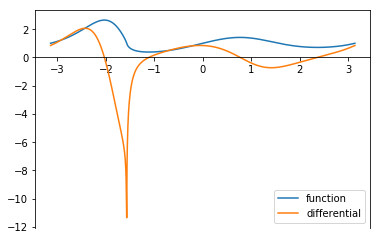

In [3]:
#plotting functions f and f_dash [-pi, pi]
NUM_POINTS = 1000 #change to vary the accuracy of graph
x_vals = np.linspace(-1 * np.pi, np.pi, NUM_POINTS)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.plot(x_vals, g(x_vals), label = "function")
plt.plot(x_vals, g_dash(x_vals), label = "differential")
plt.legend()

### Problem 2

In [4]:
'''
Defining functions for each of the difference quotients
Inputs:
    f: function whose differential needs to be calculated
    x: array of values at which differentials will be calculated
    h: default = 0.001
'''
def forward_1(f, x_vals, h = 0.001):
    return [(f(x + h) - f(x)) / h for x in x_vals]

def forward_2(f, x_vals, h = 0.001):
    return [(-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h) for x in x_vals]

def backward_1(f, x_vals, h = 0.001):
    return [(f(x) - f(x - h)) / h for x in x_vals]

def backward_2(f, x_vals, h = 0.001):
    return [(3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h) for x in x_vals]

def centered_1(f, x_vals, h = 0.001):
    return [(f(x + h) - f(x - h)) / (2 * h) for x in x_vals]

def centered_2(f, x_vals, h = 0.001):
    return [(f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h) for x in x_vals]

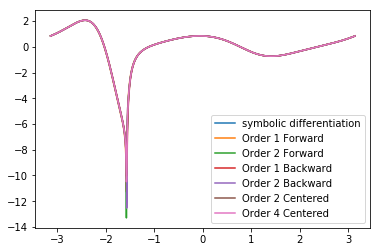

In [5]:
'''
Plotting the derivative calculated using the six approx. functions
given above and using the symbolic differentiation method for comparison
'''
h = 0.01
plt.plot(x_vals, g_dash(x_vals), label = "symbolic differentiation")
plt.plot(x_vals, forward_1(g, x_vals, h), label = "Order 1 Forward")
plt.plot(x_vals, forward_2(g, x_vals, h), label = "Order 2 Forward")
plt.plot(x_vals, backward_1(g, x_vals, h), label = "Order 1 Backward")
plt.plot(x_vals, backward_2(g, x_vals, h), label = "Order 2 Backward")
plt.plot(x_vals, centered_1(g, x_vals, h), label = "Order 2 Centered")
plt.plot(x_vals, centered_2(g, x_vals, h), label = "Order 4 Centered")

plt.legend()

#### From the graph, we can infer that any of the six approximation formulas give almost the same result as the actual derivate (with negligible error). Hence, based on the application, the approximation methods can be used in place of the real differential.

### Problem 3

In [6]:
def plot_abs_error(f, x0):
    '''
    Function plots the absolute error in calculation of differential
    for each of the six approximation methods w.r.t the actual differential
    calculated from symbolic differentiation method.
    Inputs: f: symbolic function, x0: float
    '''
    f_dash = sy.diff(f)
    g_dash = sy.lambdify(x, f_dash)
    y_sym = g_dash(x0)
    h_vals = np.logspace(-8, 0, 9)
    
    f_1 = np.array([forward_1(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(f_1 - y_sym), label = "Order 1 Forward", marker='o')
    
    f_2 = np.array([forward_2(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(f_2 - y_sym), label = "Order 2 Forward", marker='o')
                
    b_1 = np.array([backward_1(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(b_1 - y_sym), label = "Order 1 Backward", marker='o')
                
    b_2 = np.array([backward_2(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(b_2 - y_sym), label = "Order 2 Backward", marker='o')
    
    c_1 = np.array([centered_1(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(c_1 - y_sym), label = "Order 2 Centered", marker='o')

    c_2 = np.array([centered_2(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(c_2 - y_sym), label = "Order 4 Centered", marker='o')
    
    plt.loglog()
    plt.legend()
    plt.show()

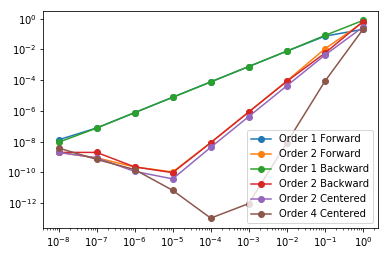

In [7]:
plot_abs_error(f, 1)

### Problem 4

In [8]:
#Calculating x_t and y_t
#importing data
df = np.load('plane.npy')
data = pd.DataFrame(df, columns = ['t', 'alpha_deg', 'beta_deg'])

#converting angle
data[['alpha_rad','beta_rad']] = np.deg2rad(data[['alpha_deg','beta_deg']])

#calculating distances in meters
data['x_m'] = 500 * np.tan(data['beta_rad']) / (np.tan(data['beta_rad']) - np.tan(data['alpha_rad']))
data['y_m'] = data['x_m'] * np.tan(data['alpha_rad'])
data

,t,alpha_deg,beta_deg,alpha_rad,beta_rad,x_m,y_m
0,7.0,56.25,67.54,0.981748,1.178795,1311.271337,1962.456239
1,8.0,55.53,66.57,0.969181,1.161866,1355.936476,1975.114505
2,9.0,54.80,65.59,0.956440,1.144761,1401.918398,1987.346016
3,10.0,54.06,64.59,0.943525,1.127308,1450.497006,2000.840713
4,11.0,53.34,63.62,0.930959,1.110378,1498.640350,2013.512411
5,12.0,52.69,62.74,0.919614,1.095020,1543.798955,2025.792234
6,13.0,51.94,61.72,0.906524,1.077217,1598.041382,2040.990583
7,14.0,51.28,60.82,0.895005,1.061509,1647.596093,2055.065571


In [9]:
#calculating differentials using first order approximation methods
def find_speed(data, h=1):
    data['speed'] = 0
    for ind in data.index.values:
        if ind == 0:
            ind1, ind2, h_new = ind+1, ind, h
        elif ind == len(data) - 1:
            ind1, ind2, h_new = ind, ind-1, h
        else: 
            ind1, ind2, h_new = ind+1, ind-1, h*2

        x_dash = (data['x_m'][ind1] - data['x_m'][ind2]) / h_new
        y_dash = (data['y_m'][ind1] - data['y_m'][ind2]) / h_new
        data['speed'][ind] = (x_dash ** 2 + y_dash ** 2) ** 0.5
    return data[['t', 'speed']]

In [10]:
find_speed(data)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,t,speed
0,7.0,46
1,8.0,47
2,9.0,48
3,10.0,50
4,11.0,48
5,12.0,51
6,13.0,53
7,14.0,51


### Problem 5

In [11]:
def calc_jacobian(f, x0, h=0.01):
    jacobian = []
    for i in range(len(x0)):
        x1, x2 = x0[:], x0[:]
        x1[i], x2[i] = (x1[i] + h, x2[i] - h)
        jacobian.append((np.array(f(*x1)) - np.array(f(*x2))) / (2 * h))

    return jacobian

In [12]:
x, y = sy.symbols('x y')
g = [x ** 2, x ** 3 - y]

In [13]:
#Solution using sympy
np.array([[sy.diff(g[i], x).subs({x: 5, y:7}).evalf() for i in range(len(g))],\
    [sy.diff(g[i], y).subs({x: 5, y:7}).evalf() for i in range(len(g))]])

array([[10.0000000000000, 75.0000000000000],
       [0, -1.00000000000000]], dtype=object)

In [14]:
#solution using numerical method
f = sy.lambdify((x, y), g)
x0 = [5,7]
jacobian = np.array(calc_jacobian(f, x0))
print(jacobian)

[[10.     75.0001]
 [ 0.     -1.    ]]


##### We find that the solution from symblic method and numerical method both produce approximately the same results.

### Problem 7

In [15]:
def time_analysis(N, h=0.01):
    time1, time2, time3 = [], [], []
    abs_error_21, abs_error_31 = [], []
    error1 = 10 ** -18
    x_vals = np.random.uniform(-1 * np.pi, np.pi, N)
    
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    f2 = sy.lambdify(x, f)
    g = lambda x : (agnp.sin(x) + 1) ** agnp.sin(agnp.cos(x))
    g1 = grad(g)
    
    for x_val in x_vals:
        #symbolic
        start = time.clock()
        f_dash1 = sy.diff(f).subs({x : x_val}).evalf()
        stop = time.clock()
        time1.append(stop - start)
        
        #numerical
        start = time.clock()
        f_dash2 = centered_2(f2, [x_val], h)
        stop = time.clock()
        time2.append(stop - start)
        abs_error_21.append(abs(f_dash2[0] - f_dash1))

        #autograd
        start = time.clock()
        f_dash3 = g1(x_val)
        stop = time.clock()
        time3.append(stop - start)
        abs_error_31.append(abs(f_dash3 - f_dash1))
    plt.scatter(time1, [error1] * N, label = "symbolic")
    plt.scatter(time2, abs_error_21, label = "numerical")
    plt.scatter(time3, abs_error_31, label = "autograd")
    plt.xlim(10 ** -5, 10 ** -1)
    plt.ylim(10 ** -19, 10 ** -6)
    plt.legend()
    plt.loglog()
    plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: De

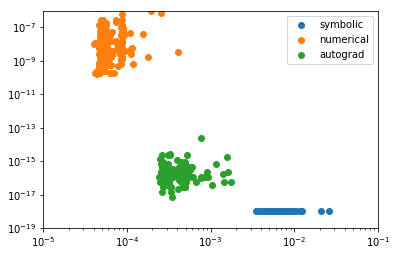

In [16]:
time_analysis(200)

##### The graph produced closely resembles the given graph. We can infer that the errors are maximum in the numerical method and minimum in the symbolic method and time is least for numerical and largest for sybolic. Hence we find that there is a trade-off between computational time and error margins for each of the methods.